In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('/kaggle/input/introvert-vs-extrovert-prediction/train.csv')
df

# loading the dataframe

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [7]:
# Handle missing values – Use mean/median/mode or drop if needed.
# Outliers – Detect with boxplots and handle (remove/cap).
# Encoding – Apply Label/One-Hot/Ordinal Encoding as needed.
# Feature Engineering – Drop unhelpful columns and create 1 new feature.

In [8]:
#handling missing values

# avg_post = {
#     'Extrovert': 11.0,
#     'Introvert': 4.5
# }


avg_post = df.groupby('Personality')['Post_frequency'].mean()

avg_post_extrovert = avg_post['Extrovert']
avg_post_introvert = avg_post['Introvert']
#avg post is accessing it like an index


# filling the post frequency column with the avg value

df['Post_frequency'].isna().sum()
#1264




1264

In [9]:
df.loc[(df['Personality'] == 'Extrovert') & (df['Post_frequency'].isna()), 'Post_frequency'] = avg_post_extrovert

df.loc[(df['Personality'] == 'Introvert') & (df['Post_frequency'].isna()), 'Post_frequency'] = avg_post_introvert

df['Post_frequency'].isna().sum()


0

In [10]:
# "forward fill": it takes the last known (non-missing) value and fills it downward into the next missing cell.
# using this to fill the values for the rest of the missing values

df.fillna(method='ffill',inplace=True)
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

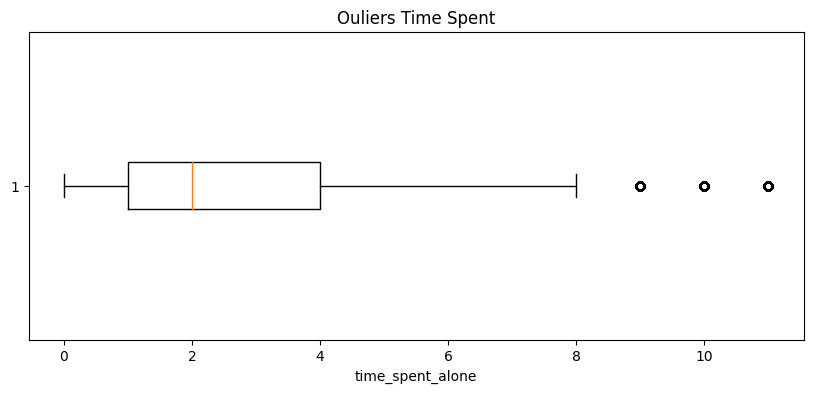

In [23]:


# Original column before capping (optional copy for comparison)
original = df['Time_spent_Alone'].copy()

# Plot before capping
plt.figure(figsize=(10, 4))
plt.boxplot(original, vert=False)
plt.title("Ouliers Time Spent")
plt.xlabel("time_spent_alone")
plt.show()




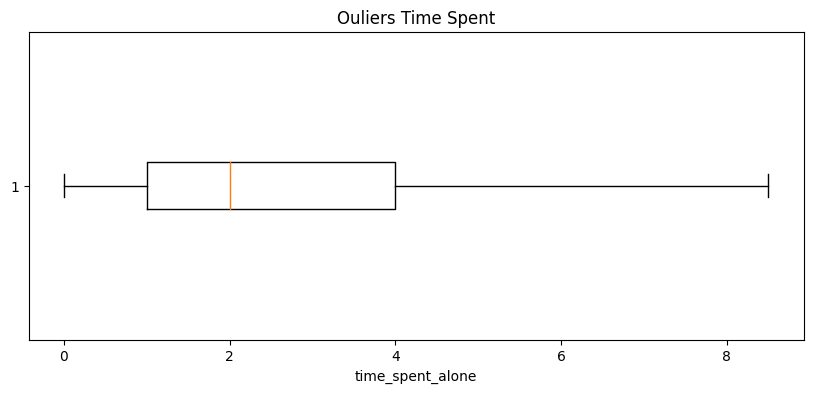

In [28]:


 

Q1 = df['Time_spent_Alone'].quantile(0.25)
Q3 = df['Time_spent_Alone'].quantile(0.75)
IQR = Q3 - Q1

# Set the capping bounds (using 1.5*IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['time_spent_alone_capped'] = df['Time_spent_Alone'].clip(lower=lower_bound, upper=upper_bound)

# Now the 'time_spent_alone_capped' column has capped values
# plotting again
plt.figure(figsize=(10, 4))
plt.boxplot(df['time_spent_alone_capped'], vert=False)
plt.title("Ouliers Time Spent")
plt.xlabel("time_spent_alone")
plt.show()


In [29]:
df
# a new column name time_spent_alone_capped

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,time_spent_alone_capped
0,0,0.0,No,6.0,4.0,No,15.0,5.000000,Extrovert,0.0
1,1,1.0,No,7.0,3.0,No,10.0,8.000000,Extrovert,1.0
2,2,6.0,Yes,1.0,0.0,No,3.0,0.000000,Introvert,6.0
3,3,3.0,No,7.0,3.0,No,11.0,5.000000,Extrovert,3.0
4,4,1.0,No,4.0,4.0,No,13.0,6.113682,Extrovert,1.0
...,...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.000000,Extrovert,3.0
18520,18520,1.0,No,6.0,7.0,No,6.0,5.000000,Extrovert,1.0
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,1.611342,Introvert,7.0
18522,18522,7.0,Yes,1.0,0.0,Yes,5.0,2.000000,Introvert,7.0


In [45]:
#one hot encoding
# original df 
df2 =df



categorical_cols = ['Personality', 'Stage_fear', 'Drained_after_socializing']

df2_encoded = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)


df2_encoded

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,time_spent_alone_capped,Personality_Introvert,Stage_fear_Yes,Drained_after_socializing_Yes
0,0,0.0,6.0,4.0,15.0,5.000000,0.0,False,False,False
1,1,1.0,7.0,3.0,10.0,8.000000,1.0,False,False,False
2,2,6.0,1.0,0.0,3.0,0.000000,6.0,True,True,False
3,3,3.0,7.0,3.0,11.0,5.000000,3.0,False,False,False
4,4,1.0,4.0,4.0,13.0,6.113682,1.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,7.0,3.0,9.0,7.000000,3.0,False,False,False
18520,18520,1.0,6.0,7.0,6.0,5.000000,1.0,False,False,False
18521,18521,7.0,1.0,1.0,1.0,1.611342,7.0,True,True,True
18522,18522,7.0,1.0,0.0,5.0,2.000000,7.0,True,True,True


In [47]:
# Feature Engineering – Drop unhelpful columns and create 1 new feature.
# dropping id
df3 = df2_encoded.drop(['id'], axis=1)

# experimental new column combining two
df3['Activity_Level'] = df3['Social_event_attendance'] + df3['Going_outside']

df3

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,time_spent_alone_capped,Personality_Introvert,Stage_fear_Yes,Drained_after_socializing_Yes,Activity_Level
0,0.0,6.0,4.0,15.0,5.000000,0.0,False,False,False,10.0
1,1.0,7.0,3.0,10.0,8.000000,1.0,False,False,False,10.0
2,6.0,1.0,0.0,3.0,0.000000,6.0,True,True,False,1.0
3,3.0,7.0,3.0,11.0,5.000000,3.0,False,False,False,10.0
4,1.0,4.0,4.0,13.0,6.113682,1.0,False,False,False,8.0
...,...,...,...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.000000,3.0,False,False,False,10.0
18520,1.0,6.0,7.0,6.0,5.000000,1.0,False,False,False,13.0
18521,7.0,1.0,1.0,1.0,1.611342,7.0,True,True,True,2.0
18522,7.0,1.0,0.0,5.0,2.000000,7.0,True,True,True,1.0
